In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import astropy.units as u
import pickle, dill, json, warnings, astropy, os
from matplotlib.colors import LogNorm
import csv
import mosaic_tools as mt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
#plt.switch_backend('Qt4Agg')

In [2]:
PT = mt.PlottingTools()

# Plotting Tools

### These functions allow one to input data and keyword argument dictionary to "quickly" plot either a line, scatter or histogram matplotlib plot

# PLOT HELP - REQUIRED

In [3]:
def triple_axes_dist(ylog=False, xlog=False, topax=True, rightax=True,
                     figsize=(10,10),xlabel='x', ylabel='y'):
    """Sets up plots with 3 axes -- one in center, one on right and one above center
        plot. The purpose is to have a scatter plot or w/e in the center, and two
        distribution plots of the x and y parameters in the side plots.
        Input:
        axScatter: axis object for center scatter plot
        ylog, xlog: booleans to indicate whether x and y axes of center plot are in
                    log scale (base 10)
        xlabel, ylabel : labels for x and y axes labels

        Return
        """
    axScatter = plt.figure(111, figsize=figsize).add_subplot(111)
    axScatter.set_xlabel('%s' % xlabel, fontsize=25)
    axScatter.set_ylabel('%s' % ylabel, fontsize=25)

    divider = make_axes_locatable(axScatter)
    if topax:
        axHistX = divider.append_axes("top", size=2, pad=0.2, sharex=axScatter)
        plt.setp(axHistX.get_xticklabels(), visible=False)
    else:
        axHistX = None

    if rightax:
        axHistY = divider.append_axes("right", size=2, pad=0.2, sharey=axScatter)
        plt.setp(axHistY.get_yticklabels(), visible=False)
    else:
        axHistY = None


    if xlog:
        axScatter.set_xscale('log')
        axHistX.set_xscale('log', nonposy='clip')
    if ylog:
        axScatter.set_yscale('log')
        axHistY.set_yscale('log', nonposy='clip')

    return axScatter, axHistX, axHistY


def plot_setup(axis, gridon=False, minortickson=True,
               ticklabel_fontsize=20, majortick_width=2.5,
               minortick_width=1.2, majortick_size=8,
               minortick_size=5, axes_linewidth=1.5,
               ytick_direction='in', xtick_direction='in',
               yaxis_right=False,ylog=False,xlog=False):

    """Changes the boring default matplotlib plotting canvas so that it
    looks nice and neat with thicker borders and larger tick marks as well
    as larger fontsizes for the axis labels. Options exist to include or
    exclude the plot grid and minortick mark labels -- set up as boolean
    variables"""

    if gridon:
        axis.grid()
    if minortickson:
        axis.minorticks_on()
    if yaxis_right:
        axis.yaxis.tick_right()

    for line in axis.yaxis.get_majorticklines():
        line.set_markeredgewidth(majortick_width)
    for line in axis.xaxis.get_majorticklines():
        line.set_markeredgewidth(majortick_width)

    for line in axis.xaxis.get_minorticklines():
        line.set_markeredgewidth(minortick_width)
    for line in axis.yaxis.get_minorticklines():
        line.set_markeredgewidth(minortick_width)

    if xlog:
        axis.set_xscale('log', nonposy='clip')
    if ylog:
        axis.set_yscale('log', nonposy='clip')


    # plt.rc('text', usetex=True)
    plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
    plt.rcParams['mathtext.fontset'] = 'stixsans'
    axis.tick_params(axis='both', which='major', labelsize=ticklabel_fontsize)
    plt.rc("axes", linewidth=axes_linewidth)
    plt.rcParams['xtick.major.size'] = majortick_size
    plt.rcParams['xtick.minor.size'] = minortick_size
    plt.rcParams['ytick.major.size'] = majortick_size
    plt.rcParams['ytick.minor.size'] = minortick_size

    plt.rcParams['xtick.direction'] = xtick_direction
    plt.rcParams['ytick.direction'] = ytick_direction

    plt.subplots_adjust(left=0.13, bottom=0.13, top=0.95, right=0.97)

    return


def linePlot(xdat,ydat,ax0=None,labels=('x','y'),xlog=False,ylog=False,**kw):
    """
    Input:
    ------
    xdat: numpy.array, x-axis data
    ydat: numpy.array, y-axis data
    ax0: None-type or axis object (plt.figure().add_subplot(111)). If None,
         an axis object is created.
    labels: 2x1 string-tuple, x and y-axis labels
    xlog, ylog: boolean, plot in log space.
    kw: dict, key-word dictionary of matplotlib plot inputs.
    
    Return:
    -------
    ax: axis plot object.
    """
    
    if ax0 is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    else: ax = ax0
    try:
        plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'

    ax.plot(xdat,ydat,**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)
    
    return ax

def scatterPlot(xdat,ydat,ax0=None,labels=('x','y'),xlog=False,ylog=False,
                figsize=(10,10),**kw):
    """
    Input:
    ------
    xdat: numpy.array, x-axis data
    ydat: numpy.array, y-axis data
    ax0: None-type or axis object (plt.figure().add_subplot(111)). If None,
         an axis object is created.
    labels: 2x1 string-tuple, x and y-axis labels
    xlog, ylog: boolean, plot in log space.
    kw: dict, key-word dictionary of matplotlib plot inputs.
    
    Return:
    -------
    ax: axis plot object.
    """
    
    if ax0 is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
    else: ax = ax0
    
    try:
        plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'

    ax.plot(xdat,ydat,linestyle='None',**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)

    return ax

def histPlot(xdat,bins=15,ax0=None,labels=('x','y'),xlog=False,ylog=False,**kw):
    """
    Input:
    ------
    xdat: numpy.array, x-axis data
    bins: int or numpy.array, bins.
    ax0: None-type or axis object (plt.figure().add_subplot(111)). If None,
         an axis object is created.
    labels: 2x1 string-tuple, x and y-axis labels
    xlog, ylog: boolean, plot in log space.
    kw: dict, key-word dictionary of matplotlib plot inputs.
    
    Return:
    -------
    ax: axis plot object.
    """
    
    if ax0 is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    else: ax = ax0

    try:
        plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'
    
    ax.hist(xdat,bins,**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)    
    
    return ax




## E.g.

kw = {'markersize':10,'color':'magenta','marker':'D','alpha':.4}<br>
sp = scatterPlot(Mp/Mj,Rp/Rj,labels=('x','y'),xlog=True,**kw)<br>
sp.saveplot('filename.jpg') --> sp is now an plot-axis object.<br><br>

kw = {'markersize':10,'color':'red','marker':'o','linewidth':2,'ls':'--','alpha':.4}<br>
lp = linePlot(Mp/Mj,Rp/Rj,labels=('hi','no'),**kw)<br><br>

kw = {'markersize':10,'color':'red','linewidth':2,'ls':'--','alpha':.4}<br>
lp2 = linePlot(Mp/Mj,Rp/Rj,labels=('hi','no'),**kw)<br><br>

kw = {'histtype':'step','normed':True}<br>
bins = np.linspace(np.array(Mp/Mj).min(),np.array(Mp/Mj).max(),20)<br>
hp = histPlot(Mp/Mj,bins=bins,labels=('mass','count'),**kw)<br>


## Load Completeness and Simulation Results
### Results are loaded from a pickle file created in "EXOSIMS_end2end.pynb"

In [25]:
baseFolder = os.path.join(os.path.expanduser('~'), 'Dropbox','Research','WFIRST','EXOSIMSTesting')
resultFolder = os.path.join(baseFolder,'SimResults')
scriptFolder = os.path.join(baseFolder,'scripts')
compFolder = os.path.join(baseFolder,'Completeness')
# ===============  LOAD JSON SCRIPT FILE =================

# jfile = 'template_WFIRST_KeplerLike.json'
# jfile = 'template_WFIRST_EarthTwinHabZone.json'
# jfile = 'template_WFIRST_KnownRV.json'
# jfile = 'template_rpateltest_KnownRV.json'
# jfile = 'template_rpateltest_KnownRV_2years.json'
# scriptfile = os.path.join(scriptFolder,jfile)
# script = open(scriptfile).read()
# specs_from_file = json.loads(script)

# ===============  LOAD COMPLETENESS FILE ===============

# cfile = 'EarthTwinHabZone2.comp'
# cfile = 'KeplerLike1.comp'
# cfile = 'KnownRVPlanets_2yrs_5E+07stars_rpateltest.comp'
# fle = os.path.join(compFolder,cfile)
# dataCOMP = pickle.load(open(fle,'rb'))

# ===============  LOAD SIMULATION RESULTS ===============

#simresults = 'simresults_2yrs_5E+07stars_rpateltest_KnownRV.pickle'
#simresults = 'simresults_0.20yrs_rpateltest_KnownRV.pickle'
#simresults = 'simresults_2.00yrs_rpateltest_KnownRV_2year.pickle'
simresults = 'simresults_WFIRST_KeplerLike1.pickle'
basesim =  simresults.strip('simresults_').strip('.pickle')

simfile = os.path.join(resultFolder,simresults)
simr = dill.load(open(simfile,'rb'))

print 'Upper level keys: \n\t', simr.keys()

Upper level keys: 
	['simr', 'AllSpecs']


In [7]:
plt.figure(figsize=(6,6))
plt.imshow(dataCOMP + 1,norm=LogNorm())
plt.colorbar()
#plt.clim(1.7,2)

NameError: name 'dataCOMP' is not defined

# LOAD DATA FROM PICKLE

In [26]:
sim = simr['simr']

In [27]:
TL = sim.TargetList
SC = sim.StarCatalog
SU = sim.SimulatedUniverse
SSim = sim.SurveySimulation
OS = sim.OpticalSystem
ZL = sim.ZodiacalLight
BS = sim.BackgroundSources
CP = sim.Completeness
PP = sim.PlanetPopulation
PM = sim.PlanetPhysicalModel

# STELLAR PROPERTIES

In [28]:
Name   = TL.Name
Spec   = TL.Spec
parx   = TL.parx
Umag   = TL.Umag
Bmag   = TL.Bmag
Vmag   = TL.Vmag
Rmag   = TL.Rmag
Imag   = TL.Imag
Jmag   = TL.Jmag
Hmag   = TL.Hmag
Kmag   = TL.Kmag
dist   = TL.dist
BV = TL.BV
MV = TL.MV
BC = TL.BC
L  = TL.L
coords = TL.coords
pmra   = TL.pmra
pmdec  = TL.pmdec
rv = TL.rv
Binary_Cut = TL.Binary_Cut
#maxintTime = OS.maxintTime
comp0  = TL.comp0
MsEst  = TL.MsEst
MsTrue = TL.MsTrue
nStars = TL.nStars

star_prop = {'Name':Name,'Spec':Spec,'parx':parx,'Umag':Umag,'Bmag':Bmag,'Vmag':Vmag,
            'Imag':Imag,'Jmag':Jmag,'Hmag':Hmag,'Kmag':Kmag,'dist':dist,'BV':BV,
            'MV':MV,'Lum':L,'coords':coords,'pmra':pmra,'pmdec':pmdec,'rv':rv,
            'Binary_Cut':Binary_Cut,'comp0':comp0,'MsEst':MsEst,
            'MsTrue':MsTrue,'nStars':nStars}#,'maxintTime':maxintTime}
sp = star_prop
print 'Star property keys: \n\t', sp.keys()


Star property keys: 
	['Bmag', 'dist', 'BV', 'Binary_Cut', 'Lum', 'rv', 'Vmag', 'Imag', 'Kmag', 'Spec', 'pmdec', 'MsEst', 'Name', 'nStars', 'Jmag', 'Hmag', 'parx', 'MsTrue', 'Umag', 'comp0', 'MV', 'coords', 'pmra']


# PLANETS GENERATED DATA

In [29]:
try:
    arange = TL.arange 
    erange = TL.erange
    wrange = TL.wrange
    Orange = TL.Orange
    prange = TL.prange
    Irange = TL.Irange
    Rrange, Mprange = TL.Rrange, TL.Mprange
    rrange = TL.rrange
    synplanet_prop = {'arange':arange,'erange':erange,'wrange':wrange,'Orange':Orange,
                      'prange':prange,'Irange':Irange,'Rrange':Rrange,'Mprange':Mprange,
                      'rrange':rrange}
except AttributeError:
    print 'Sorry.. no go.'
    print 'Not simulated planets.'
    synplanet_prop = None

try:
    nPlans, plan2star = SU.nPlans, SU.plan2star
    sInds = SU.sInds
    # ORBTIAL PARAMETERS
    sma,e,w,O,I = SU.a, SU.e, SU.w, SU.O, SU.I
    # PLANET PROPERTIES
    Mp,Rp = SU.Mp, SU.Rp
    # POSITION AND VELOCITY VECTOR OF PLANET
    r, v = SU.r, SU.v
    # ALBEDO
    p = SU.p
    fEZ = SU.fEZ

    empplanet_prop = {'nplans':nPlans,'plan2star':plan2star,'sInds':sInds,'sma':sma,
                      'e':e,'w':w,'O':O,'I':I,'Mp':Mp,'Rp':Rp,'r':r,'v':v,'p':p,'fEZ':fEZ}
except AttributeError:
    print 'Sorry.. no go.'
    print 'Not ``real`` planets.'
    empplanet_prop = None

pd_s = synplanet_prop
if pd_s is not None:
    print 'Simulated Planet property keys: \n\t', pd_s.keys()
else: print 'No simulated planets from this simulation'    
    
pd_e = empplanet_prop
if pd_e is not None:
    print 'Empirical Planet property keys: \n\t', pd_e.keys()
else: print 'No empirical planets from this simulation'    

Sorry.. no go.
Not simulated planets.
No simulated planets from this simulation
Empirical Planet property keys: 
	['Rp', 'I', 'sInds', 'O', 'Mp', 'e', 'plan2star', 'nplans', 'p', 'r', 'w', 'v', 'fEZ', 'sma']


## Stellar Data

In [11]:
sp = simr['star_prop']
print 'Star property keys: \n\t', sp.keys()

KeyError: 'star_prop'

## Simulated Planet Data

In [30]:
pd_s = simr['synplanet_prop']
if pd_s is not None:
    print 'Simulated Planet property keys: \n\t', pd_s.keys()
else: print 'No simulated planets from this simulation'

KeyError: 'synplanet_prop'

## Empirical Planet Data

In [31]:
pd_e = simr['empplanet_prop']
if pd_e is not None:
    print 'Empirical Planet property keys: \n\t', pd_e.keys()
else: print 'No empirical planets from this simulation'

KeyError: 'empplanet_prop'

# DRM and Specs of simulation


<b><font color='blue'>fill_keys</font></b><br>
<b><font color='red'>not_sure</font></b><br>
<b><font color='green'>dontdoanything</font></b><br>
<b><font color='magenta'>expand_keys</font></b><br>

<b><font color='blue'>star_ind (integer)</font></b><br>
    Index of the observed target star<br>

<b><font color='blue'>arrival_time (float)</font></b> <br>
    Elapsed time since mission start when observation begins in units of day<br>

<b><font color='magenta'>plan_inds (integer list)</b> <br>
    Indices of planets orbiting the observed target star<br>
    
<b><font color='blue'>det_time (float)</b> <br>
    Integration time for detection in units of day<br>
    
<b><font color='magenta'>det_status (integer list)</b> <br>
    List of detection status for each planet orbiting the observed targetstar, where 1 is detection, 0 missed detection, -1 below IWA, and -2 beyond OWA<br>
    
<b><font color='magenta'>det_SNR (float list)</b> <br>
    List of detection SNR values, only for observable planets<br>
    
<b><font color='magenta'>det_fEZ (float list)</b> <br>
    List of exo-zodi surface brightnesses at detection in units of 1=arcsec2 for each planet orbiting the observed target star<br>
    
<b><font color='magenta'>det_dMag (float list)</b> <br>
    List of delta magnitudes at detection for each planet orbiting the observed target star<br>
    
<b><font color='magenta'>det_WA (float list)</b> <br>
    List of working angles at detection in units of mas for each planet orbiting the observed target star<br>
    
<b><font color='green'>char_mode (dict)</b><br>
    Observing mode selected for characterization. Default is first spectro/IFS mod<br>
    
<b><font color='blue'>char_time (float)</b><br>
    Integration time for characterization in units of day<br>
    
<b><font color='magenta'>char_status (integer list)</b><br>
    List of characterization status for each planet orbiting the observed target star, where 1 is full spectrum, -1 partial spectrum, and 0 not characterized<br>
    
<b><font color='magenta'>char_SNR (float list)</b><br>
    List of characterization SNR values only for observable planets<br>
    
<b><font color='magenta'>char_fEZ (float list)</b><br>
    List of exo-zodi surface brightnesses at characterization in units of 1=arcsec2 for each planet orbiting the observed target star<br>

<b><font color='magenta'>char_dMag (float list)</b><br>
    List of delta magnitudes at characterization for each planet orbiting the observed target star<br>
    
<b><font color='magenta'>char_WA (float list)</b><br>
    List of working angles at characterization in units of mas for each planet orbiting the observed target star<br>

<b><font color='red'>FA_status (integer)</b><br>
    (if false alarm) Characterization status for a false alarm signal, where 1 is full spectrum, -1 partial spectrum, and 0 not characterized<br>
    
<b><font color='red'>FA_SNR (float)</b><br>
    (if false alarm) Characterization SNR value for a false alarm signal<br>
    
<b><font color='red'>FA_fEZ (float)</b><br>
    (if false alarm) Exo-zodi surface brightness for a false alarm signal in units of 1=arcsec2<br>
    
<b><font color='red'>FA_dMag (float)</b><br>
    (if false alarm) Delta magnitude for a false alarm signal<br>

<b><font color='red'>FA_WA (float)</b><br>
    (if false alarm) Working angle for a false alarm signal in units of mas<br>
    
<b><font color='green'>slew_time (float)</b><br>
    (if  occulter) Slew time to next target in units of day<br>

<b><font color='green'>slew_angle (float)</b><br>
    (if occulter) Slew angle to next target in units of deg<br>
    
<b><font color='green'>slew_dV (float)</b><br>
    (if occulter) Slew DV in units of m=s<br>

<b><font color='green'>slew_mass_used (float)</b><br>
    (if occulter) Slew fuel mass used in units of kg<br>
    
<b><font color='red'>det_dV (float)</b><br>
    (if occulter)  Detection station-keeping DV in units of m=s<br>
    
<b><font color='red'>det_mass_used (float)</b><br>
    (if occulter) Detection station-keeping fuel mass used in units of kg<br>
    
<b><font color='red'>det_dF_lateral (float)</b><br>
    (if occulter) Detection station-keeping lateral disturbance force on occulter in units of N<br>

<b><font color='red'>det_dF_axial (float)</b><br>
    Detection station-keeping axial disturbance force on occulter in units of N<br>
    
<b><font color='red'>char_dV (float)</b><br>
    (if occulter) Characterization station-keeping DV in units of m=s<br>
    
<b><font color='red'>char_mass_used (float)</b><br>
    (if occulter) Characterization station-keeping fuel mass used in units of kg<br>
    
<b><font color='red'>char_dF_lateral (float)</b><br>
    (if occulter) Characterization station-keeping lateral disturbance force on occulter in units of N<br>
    
<b><font color='red'>char_dF_axial (float)</b><br>
    (if occulter) Characterization station-keeping axial disturbance force on occulter in units of N<br>
    
<b><font color='red'>sc_mass (float)</b><br>
    (if occulter) Maneuvering spacecraft mass at the end of target observation in units of kg

### Grouping of keys in DRM

### The "reformat_DRM" function takes the EXOSIMS' DRM and reconstructs it into a dictionary of all keys in simulated DRM. The arrays are in order of the original DRM list order.

In [49]:
concatenate_keys = ['plan_inds'  ,'det_status',
                    'det_SNR'    ,'det_fEZ',
                    'det_dMag'   , 'det_WA',
                    'char_status','char_SNR',
                    'char_fEZ'   ,'char_dMag',
                    'char_WA'    ,'FA_status',
                    'FA_SNR'     ,'FA_dMag','FA_WA']
expand_keys = ['arrival_time','star_ind','det_time','char_time']

for ky in concatenate_keys + expand_keys:
    if 'ind' in ky:
        print ky

plan_inds
star_ind


In [86]:
DDRM['plan_inds'].dtype

dtype('int32')

In [94]:
DDRM['plan_inds']

masked_array(data = [745 1335 2433 4613 1456 194 2839 -- 65 2669 3046 3600 4369 1325 1336 3011
 4331 1533 2051 3085 1471 1851 2422 3264 1192 3041 3694 1468 3008],
             mask = [False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False],
       fill_value = 999999)

In [90]:
import pdb
def reformat_DRM(drm):
    
    """
    PROCESS THE EXOSIMS RESULTS DRM OBJECT IN A MORE PALLATABLE FORMAT.
    DRM IS CURRENTLY A LIST OF DICTIONARY THAT CONTAINS INFORMATION FOR EVERY VISIT.
    THIS REFORMATTER TURNS IT INTO A DICTIONARY OF RESULTS 
    
    """
    
    # list of keys to not do anything with -- in terms of expanding or concatenating.
    # THESE CAN BE UDPATED LATER
    dontdoanything = ['char_mode'      ,'slew_time',
                      'slew_angle'     ,'slew_dv',
                      'slew_mass_used' ,'FA_fEZ',
                      'det_DV'         ,'det_mass_used',
                      'det_dF_lateral' ,'det_dF_axial', 
                      'char_dV'        , 'char_mass_used',
                      'char_dF_lateral','char_dF_axial', 'sc_mass']

    # list of keys whose array elements need to be repeated based on number of planets 
    # detected per star.
    expand_keys = ['arrival_time','star_ind','det_time','char_time']

    # concatenate the arrays of these keys. In the end, each element in these arrays will have their
    # own individually mapped index in arrays in fill_keys.
    concatenate_keys = ['plan_inds'  ,'det_status',
                        'det_SNR'    ,'det_fEZ',
                        'det_dMag'   , 'det_WA',
                        'char_status','char_SNR',
                        'char_fEZ'   ,'char_dMag',
                        'char_WA'    ,'FA_status',
                        'FA_SNR'     ,'FA_dMag','FA_WA']

    
   # CHECK IF DRM IS EMPTY
    if drm:
        # COLLECT ALL KEYS IN DRM AND UNIQUE-IFY THE ARRAY
        kys = np.array([dt.keys() for dt in drm])
        kys = np.unique(np.concatenate(kys))

        # CREATE DICTIONARY OF DRM BASED ON KEYWORDS
        ddrm = {}

        for ky in kys:

            # ADD VALUE, UNLESS EMPTY OR KEY DOE
            ddrm[ky] = np.array([[np.nan] if ky not in dt or 
                                 (not dt[ky] and not isinstance(dt[ky],(int,long,float))) 
                                 else dt.get(ky,[np.nan]) for dt in drm])

        plan_raw_inds = ddrm['plan_inds']

        # FILL OUT PROPER ARRAYS 
        for ky in expand_keys:
            try:
                vals = ddrm[ky]
                # ADD SAME # AS PLANETS DETECTED. 
                # AT LEAST ONE ADDED EVEN WITH NO PLANETS DETECTED
                temp_val = [[vals[i]] * len(plan_raw_inds[i])
                            for i in xrange(len(plan_raw_inds)) ]


                ddrm[ky] = np.concatenate(temp_val)
            except KeyError: print '%s not found.'%ky

        for ky in concatenate_keys:
            try:
                ddrm[ky] = np.concatenate(ddrm[ky])
            except KeyError: print '%s not found'%ky
        
        for ky in ddrm.keys():

            if ddrm[ky].dtype == 'O': pass # FOR MODE DICTIONARIES
            
            elif 'ind' in ky:
                ddrm[ky] = ma.masked_invalid(ddrm[ky]).astype('int32')
            else: ddrm[ky] = ma.masked_invalid(ddrm[ky])
                
            
    else:
        ddrm = None

    
    return ddrm

In [91]:
try:
    AllSpecs = simr['AllSpecs']
    DRM = simr['DRM']
    DDRM = reformat_DRM(DRM)
except: print 'something wrong.'
    
AllSpecs = simr['AllSpecs']
DRM = sim.SurveySimulation.DRM
DDRM = reformat_DRM(DRM)

something wrong.
FA_status not found
FA_SNR not found
FA_dMag not found
FA_WA not found


In [132]:
len(SU.sInds)

1442

In [134]:
SU.plan2star

array([1089,  468,  622, ...,  545,  147,    3])

In [133]:
SU.plan2star.max()

1509

In [126]:
# Indices of all the stars for each planet.
np.where(SU.plan2star == 0)
# the planets for the first star are located in indexs 2434 and 4201 in plan2star.

(array([2434, 4201]),)

In [140]:
plan2star

array([1089,  468,  622, ...,  545,  147,    3])

In [170]:
TL.nStars

1510

In [169]:
len(TL.Name)

1510

In [172]:
sInds = SU.sInds
print len(TL.Name[sInds])
print len(TL.Name)
print len(TL.Name[np.unique(plan2star)])

1442
1510
1442


In [151]:
print TL.Bmag[plan2star]
print TL.Name[plan2star]

[  9.42   9.23  11.75 ...,  10.98  11.63   9.57]
['HIP 84607' 'HIP 34950' 'HIP 48190 A' ..., 'HIP 40910' 'HIP 10960'
 'HIP 436']


In [143]:
SU.sInds[1089]

1142

In [ ]:
plan2star = SU.plan2star
starind = SU.sInds
ind = np.where
    
    for si in starind:
        pi = np.where(si==plan2star)[0]
        

In [125]:
len(np.unique(SU.plan2star))

1442

In [122]:
len(SU.sInds)

1442

# OUTPUT FILES FROM ALLSPEC DICTIONARY
# THIS PIECE OF CODE SHOULD BE INCLUDED SO THAT WE GET SOME CSV FILES

In [34]:
with open('./SimResults/Input_leftover_params.csv', 'wb') as myfile:
    w = csv.writer(myfile,delimiter=',')
    
    for key, val in AllSpecs.items():
        
        
        if type(val) == list:
            i = 1
            with open('./SimResults/Input_{}.csv'.format(key), 'wb') as myfile_list:
                wl = csv.writer(myfile_list)
                for aitems in AllSpecs[key]:
                    wl.writerow(['{}'.format(key), '{}'.format(i)])
                    for keyl, vall in aitems.items():
                        wl.writerow([keyl,vall])
                        myfile_list.flush()
                    i +=1

        elif type(val) == dict:
            with open('./SimResults/Input_{}.csv'.format(key),'wb') as myfile_dict:
                wd = csv.writer(myfile_dict)
                for keyd,vald in AllSpecs[key].items():
                    wd.writerow([keyd,vald])
                    myfile_dict.flush()

        else:
            w.writerow([key, val])
            myfile.flush()

# OUTPUT ON SCREEN (TOO MESSY) OF ALL SPEC DICTIONARY

## USE THE ABOVE OUTPUT FILES OF ALLSPEC DICTIONARY INSTEAD

import pprint
nchar = [len(ky) for ky,val in AllSpecs.items()]
maxchar = np.max(nchar)

#for keys,vals in AllSpecs.items():
#    print ('{0:%i} ==> {1:10}'%maxchar).format(keys,vals)
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(AllSpecs)

#  CREATE VARIABLES

In [116]:
Mprange = AllSpecs['Mprange']
arange = AllSpecs['arange']

# indices of targets observed in order including repeats
target_obsind = DDRM['star_ind']

# indices of all planets detected for each star.
try:
    detind_pl = DDRM['plan_inds']
#    detind_pl = np.concatenate(detind_pl).astype('int32')
except: print 'No planets detected?'

#arrival time array
arrival_time = DDRM['arrival_time']

# angular distance of each detection ? mas
det_wa = DDRM['det_WA']

# status of any detections
det_status = DDRM['det_status']

# detection of planets

target_observed = sp['Name'][target_obsind]
detstatus_array = np.array([ dt['det_status'] for dt in DRM])

## Target Plots
### Red circles are targets that were observed

In [36]:
save_plots = False

In [37]:
dirsave = os.path.join(baseFolder,'SimPlots')

# COORDINATE INFORMATION
coords = sp['coords']
ra = coords.ra.deg 
ra[ra>180] -= 360
ra = -1*ra
ra_rad, dec_rad = np.radians(ra), coords.dec.radian
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360,360)

# others
BV, MV = sp['BV'], sp['MV']
dist = sp['dist']


In [38]:
def skyplot(ra,dec,figsize=(20,20),projection='mollweide',axisbg='white',ticklcolor=None):

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection=projection, axisbg =axisbg)

    plt.setp(ax.spines.values(), linewidth=10)
    if ticklcolor is not None:
        ax.set_xticklabels(tick_labels,color=ticklcolor)     # we add the scale on the x axis
    else:
        ax.set_xticklabels(tick_labels)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
        tick.label1.set_fontsize(20)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
        tick.label1.set_fontsize(20)
        
    return ax

## SKY LIGHT -- USE THESE 

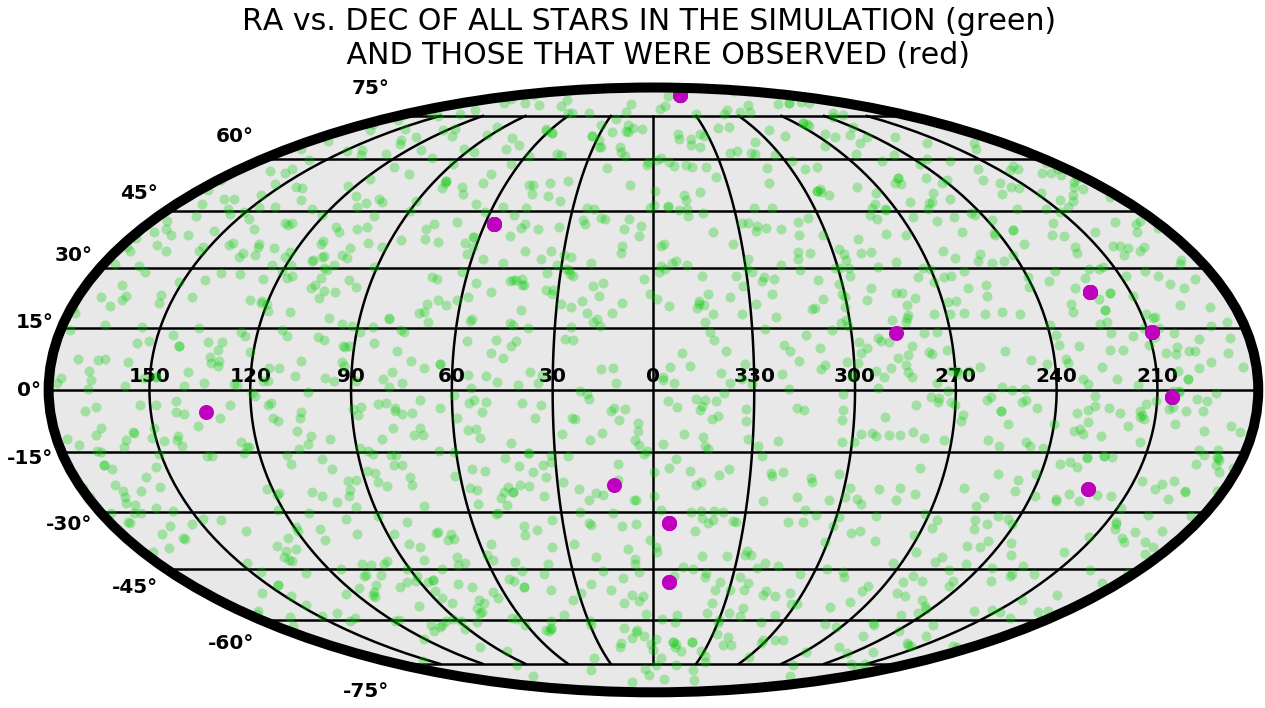

In [135]:
axt = skyplot(ra_rad,dec_rad,axisbg='#E8E8E8')

plot_setup(axt)
plt.grid(color='black',lw=2.5)
axt.plot(ra_rad,dec_rad,'o',color='#00cc00',ms=10,mec='none',label='Stars in survey',alpha=0.3)
axt.plot(ra_rad[target_obsind],dec_rad[target_obsind],'mo',ms=10,mec='m',mew=5,label='Stars observed')

txt = """RA vs. DEC OF ALL STARS IN THE SIMULATION (green) \n AND THOSE THAT WERE OBSERVED (red)"""
axt.set_title('%s'%txt,fontsize=30,y=1.03)

if save_plots: plt.savefig(os.path.join(dirsave,'sky_targets_%s.png'%basesim),bbox_inches='tight')


## OBSERVATION ORDER NUMBER

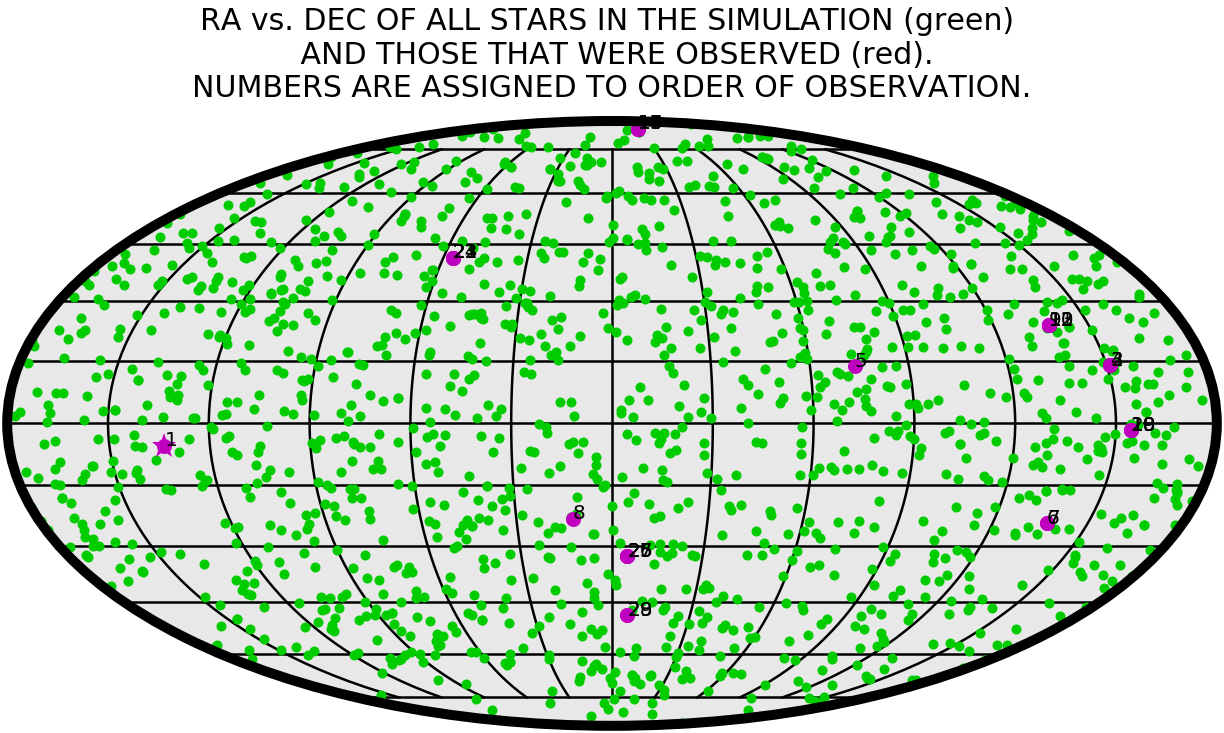

In [40]:
# ==================================================================================================================
#         Observation Order
# ==================================================================================================================
axt2 = skyplot(ra_rad,dec_rad,axisbg='#E8E8E8')
plot_setup(axt2)
plt.grid(color='black',lw=2.5)
axt2.plot(ra_rad,dec_rad,'o',color='#00cc00',ms=10,mec='none')
axt2.plot(ra_rad[target_obsind],dec_rad[target_obsind],'mo',ms=10,mec='m',mew=5)

#axt2.plot(ra_rad[target_obsind],dec_rad[target_obsind],'r-',mew=2,lw=4,alpha=0.5)
axt2.tick_params(labelbottom='off',top='off',which='both',labelleft='off')
for i,j in enumerate(target_obsind):
    if i == 0:
        axt2.plot(ra_rad[j],dec_rad[j],'m*',ms=26,mec='none')
    axt2.text(ra_rad[j], dec_rad[j],str(i+1),color='k',fontsize=20)

txt = """RA vs. DEC OF ALL STARS IN THE SIMULATION (green) \n AND THOSE THAT WERE OBSERVED (red).
NUMBERS ARE ASSIGNED TO ORDER OF OBSERVATION."""    
axt2.set_title('%s'%txt,fontsize=30,y=1.03)    
#axt.set_xticklabels(tick_labels)
#plt.legend()
if save_plots: plt.savefig(os.path.join(dirsave,'sky_targets_order_%s.png'%basesim),bbox_inches='tight')

## OBSERVATION ORDER LINES

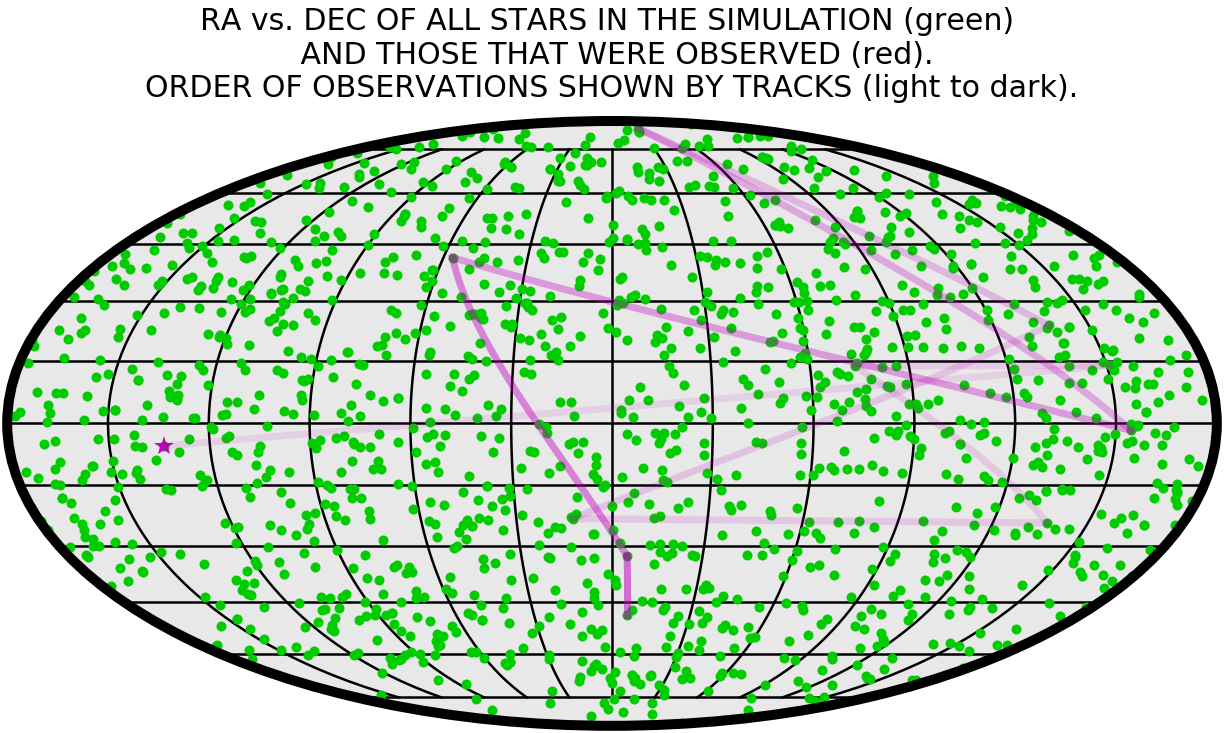

In [41]:
axt3 = skyplot(ra_rad,dec_rad,axisbg='#E8E8E8')
plot_setup(axt3)
plt.grid(color='black',lw=2.5)
axt3.plot(ra_rad,dec_rad,'o',color='#00cc00',ms=10,mec='none')

alp = np.logspace(-1,np.log10(0.6),len(target_obsind))#[::-1]
for i in xrange(len(target_obsind)):
    if i == len(target_obsind)-1:
        pass
    else:
        axt3.plot([ra_rad[target_obsind[i]],ra_rad[target_obsind[i+1]]],
                  [dec_rad[target_obsind[i]],dec_rad[target_obsind[i+1]]],
                  'm-',mew=2,lw=7,alpha=alp[i])

axt3.xaxis.label.set_color('lightgray')
axt3.tick_params(axis='both', colors='lightgray')

txt = """RA vs. DEC OF ALL STARS IN THE SIMULATION (green) \n AND THOSE THAT WERE OBSERVED (red).
ORDER OF OBSERVATIONS SHOWN BY TRACKS (light to dark)."""    
axt3.set_title('%s'%txt,fontsize=30,y=1.03)    

#plt.setp(axt2.spines.values(), color='lightgray',linewidth=10)
axt3.tick_params(labelbottom='off',top='off',which='both',labelleft='off')
for i,j in enumerate(target_obsind):
    if i == 0:
        axt3.plot(ra_rad[j],dec_rad[j],'m*',ms=20,mec='none')

plt.savefig(os.path.join(dirsave,'skytest.png'),edgecolor='none',bbox_inches='tight')        

## POINTS DARK - DON'T USE THESE YET

axt = skyplot(ra_rad,dec_rad,axisbg='black',ticklcolor='ivory')
PT.plot_setup(axt)
plt.grid(color='silver',lw=2.5)
axt.plot(ra_rad,dec_rad,'ro',ms=10,mec='yellow',label='Stars in survey')
axt.plot(ra_rad[target_obsind],dec_rad[target_obsind],'co',ms=10,mec='c',mew=5,label='Stars observed')


txt = """
      Sky mollweide projection of all the targets used in the survey simualaion (dots), 
      and the path the simulated observatory took to observe the best targets based on the
      completeness calculation. The observatory followed the path from faintest to brightest track.
        """        
axt.set_title('%s'%txt,fontsize=30,y=1.07,loc='left')

#axt.set_xticklabels(tick_labels,color='ivory')

plt.legend(fontsize=15,numpoints=1)
if save_plots: plt.savefig(os.path.join(dirsave,'dark_%s.png'%basesim), transparent=True)


## OBSERVATION ORDER DARK - NOT SURE HOW IT LOOKS

axt2 = plt.figure(figsize=(20,20)).add_subplot(111,projection='mollweide',axisbg ='black')
PT.plot_setup(axt2)
#plt.grid(color='lightgray')

axt2.plot(ra_rad,dec_rad,'yo',ms=6,alpha=0.5,mec='none')
axt2.plot(ra_rad[target_obsind],dec_rad[target_obsind],'co',ms=8,mec='none')

alp = np.logspace(-1,np.log10(0.6),len(target_obsind))[::-1]
for i in xrange(len(target_obsind)):
    if i == len(target_obsind)-1:
        pass
    else:
        axt2.plot([ra_rad[target_obsind[i]],ra_rad[target_obsind[i+1]]],
                  [dec_rad[target_obsind[i]],dec_rad[target_obsind[i+1]]],
                  'c-',mew=2,lw=7,alpha=alp[i])


#axt2.spines['bottom'].set_color('lightgray')
#axt2.spines['left'].set_color('lightgray')
axt2.xaxis.label.set_color('lightgray')
axt2.tick_params(axis='both', colors='lightgray')


plt.setp(axt2.spines.values(), color='lightgray',linewidth=10)
axt2.tick_params(labelbottom='off',top='off',which='both',labelleft='off')
for i,j in enumerate(target_obsind):
    if i == 0:
        axt2.plot(ra_rad[j],dec_rad[j],'m*',ms=20,mec='none')

plt.show()        
#plt.savefig('skytest.png',edgecolor='none',transparent=True)        

## Color Magnitude Diagram

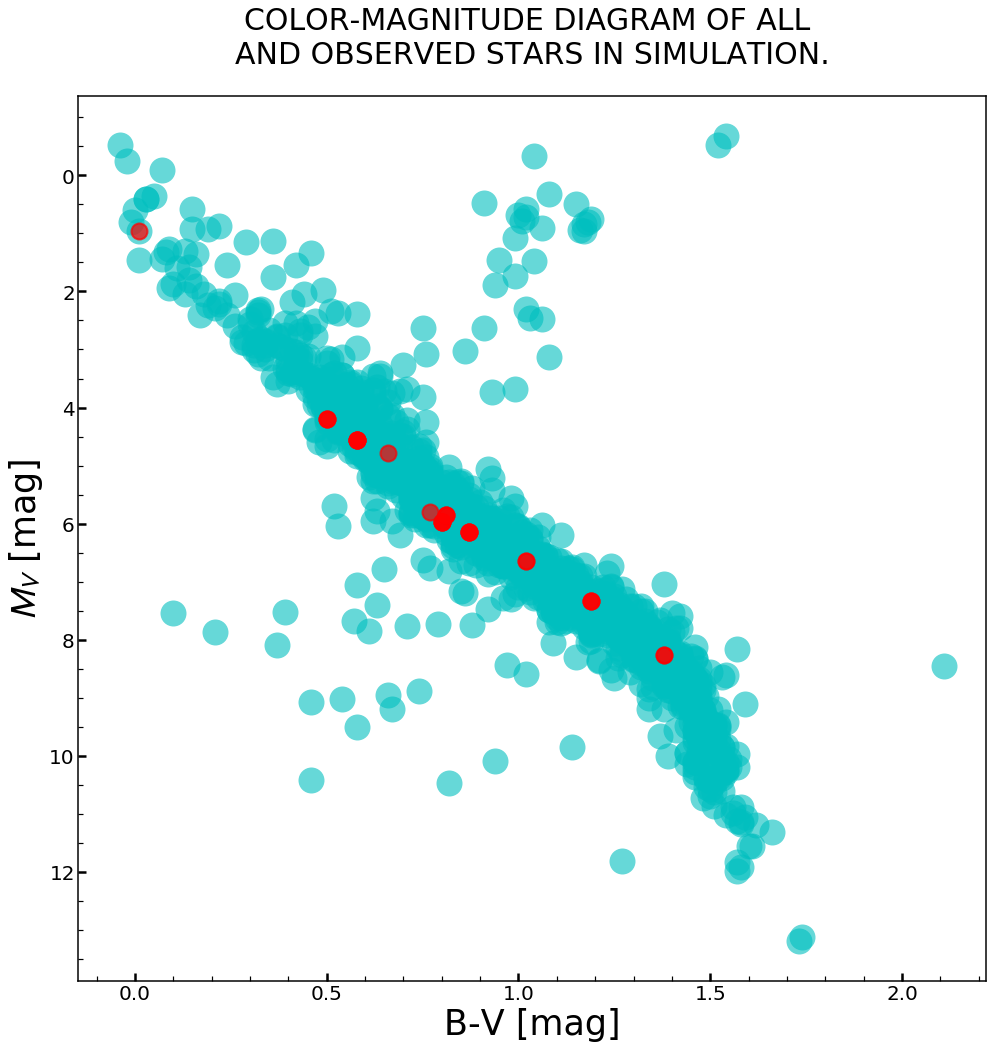

In [43]:
# ==================================================================================================================
#         CMD
# ==================================================================================================================
kw = {'markersize':26,'color':'c','marker':'o','alpha':.6,'mec':'none'}
axbv = scatterPlot(BV,MV,figsize=(15,15),**kw)
axbv.plot(BV[target_obsind],MV[target_obsind],'ro',markersize=16,mec='red',mew=2,alpha=0.7)
axbv.set_ylim(axbv.get_ylim()[::-1])
axbv.set_xlabel(r'B-V [mag]',fontsize=35)
axbv.set_ylabel(r'$M_V$ [mag]',fontsize=35)


txt = """COLOR-MAGNITUDE DIAGRAM OF ALL \nAND OBSERVED STARS IN SIMULATION."""
axbv.set_title('%s'%txt,fontsize=30,y=1.03)
if save_plots: plt.savefig(os.path.join(dirsave,'target_CMD_%s.png'%basesim))


## Distance vs. B-V

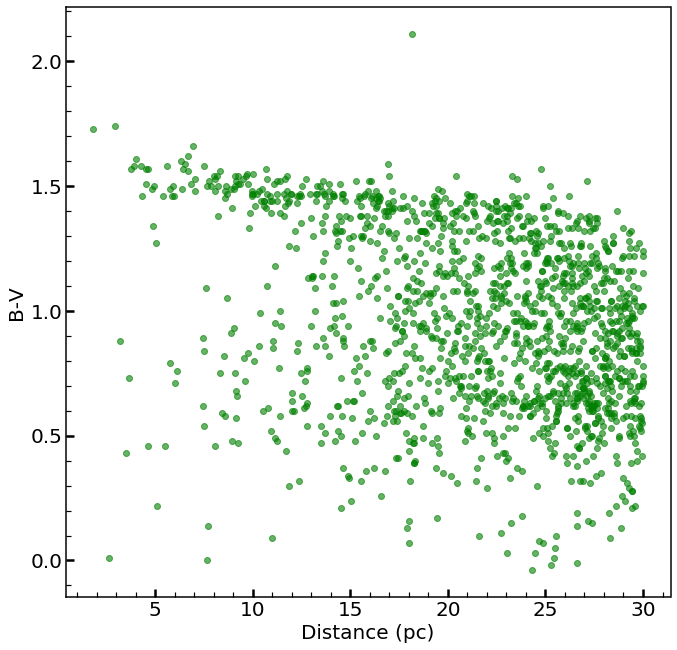

In [44]:
# ==================================================================================================================
#            DISTANCE VS. B-V
# ==================================================================================================================

kw = {'markersize':6,'color':'g','marker':'o','alpha':.6}
axbvd = scatterPlot(dist,BV,labels=('Distance (pc)','B-V'),**kw)
#axbvd.plot(dist[target_obsind],BV[target_obsind],'ro',ms=6,mfc='none',mec='r',mew=2)
#axbvd.set_title('%s'%basesim)
#if save_plots: axbvd.savefig(os.path.join(dirsave,'target_dist_v_B-V_%s.png'%basesim))

## Planet Plots

In [45]:
Rj = 69.911e6 #meters
Mj = 1.898e27 #Kg

# BINS & DATA
Mp,Rp = pd_e['Mp'], pd_e['Rp']
sma,ecc = pd_e['sma'], pd_e['e']
ebins = np.linspace(0,1,7)
logarange = np.log10(arange)
smabins = np.logspace(logarange[0],logarange[1],10)
massbins = np.linspace(.001,50,20)

In [111]:
sp[]

{'BV': array([ 0.88,  0.77,  1.47, ...,  1.04,  0.74,  1.38]),
 'Binary_Cut': array([False, False, False, ..., False, False, False], dtype=bool),
 'Bmag': array([  9.12,   8.58,  11.42, ...,   9.74,   8.21,  11.95]),
 'Hmag': array([ 6.341,  6.027,  6.098, ...,  6.289,  5.77 ,  7.462]),
 'Imag': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Jmag': array([ 6.773,  6.398,  6.704, ...,  6.799,  6.128,  8.059]),
 'Kmag': array([ 6.23,  5.93,  5.85, ...,  6.11,  5.71,  7.27]),
 'Lum': array([ 0.46,  0.52,  0.04, ...,  0.23,  0.62,  0.08]),
 'MV': array([ 5.86382389,  5.70280305,  9.69423739, ...,  6.89230514,
         5.47249669,  8.48347208]),
 'MsEst': array([ 0.8943597 ,  0.9174338 ,  0.53198962, ...,  0.76534589,
         0.95195994,  0.61578148]),
 'MsTrue': array([ 0.93034576,  0.89180548,  0.50764007, ...,  0.71515226,
         0.98192202,  0.61565275]),
 'Name': array(['HIP 57', 'HIP 400', 'HIP 428', ..., 'HIP 118261', 'HIP 118278',
        'HIP 120148'], dtype=object),
 'Spec': arr

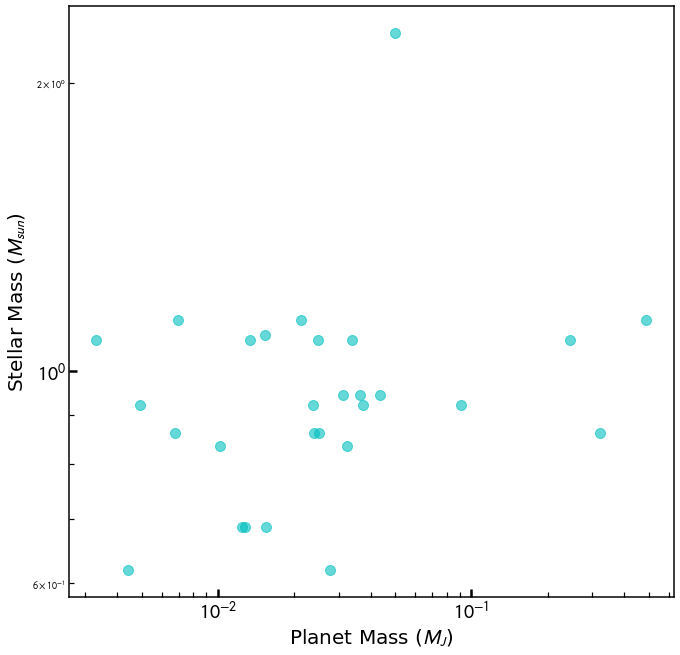

In [114]:
# =============================================================
# PLANET MASS VS. STELLAR MASS
kw = {'markersize':10,'color':'c','marker':'o','alpha':.6, 'label':'Generated Planets'}
pinds = DDRM['plan_inds']
sinds = DDRM['star_ind']
axp = scatterPlot(Mp[pinds[~pinds.mask]]/Mj,sp['MsTrue'][sinds[~pinds.mask]],
                  labels=('Planet Mass ($M_J$)','Stellar Mass ($M_{sun}$)'),
                  xlog=True, ylog=True,**kw)

#axp.grid(which='both',axis='y')


# # MASS VS. RADIUS OF PLANETS
# kw = {'markersize':4,'color':'b','marker':'o','alpha':.6, 'label':'Generated Planets'}
# axp = scatterPlot(Mp/Mj,Rp/Rj,labels=('Planet Mass ($M_J$)','Planet Radius ($R_J$)'),
#                   xlog=True, ylog=True,**kw)
# axp.plot(Mp[detind_pl]/Mj,Rp[detind_pl]/Rj,'ro',ms=5,mfc='none',mec='r', mew=3,label='Detected Planets')
# plt.legend()
# if save_plots: axp.savefig(os.path.join(dirsave,'planet_R_v_M_%s.png'%basesim))


# # HISTOGRAM OF SMA
# kw = {'histtype':'step','normed':True,'lw':3,'color':'g','label':'Input Planets'}
# axps = histPlot(sma,bins=smabins,labels=('SMA (AU)','Number of Stars'),
#                 xlog=True,**kw)
# kw = {'histtype':'step','normed':True,'lw':3,'color':'m','label':'Detected Planets'}
# axps = histPlot(sma[detind_pl],smabins,axps,labels=('SMA (AU)','Number of Stars'),
#                 xlog=True, **kw)
# plt.legend()
# if save_plots: axps.savefig(os.path.join(dirsave,'planet_SMA_distribution_%s.png'%basesim))


# # HISTOGRAM OF ECCENTRICITY
# kw = {'histtype':'step','lw':3,'color':'g','label':'Input Planets'}
# axe = histPlot(ecc,bins=ebins,labels=('eccentricity','Number of Stars'),**kw)
# axe.hist(ecc[detind_pl],bins=ebins,histtype='step',lw=3,color='m',label='Detected Planets');
# plt.legend()
# if save_plots: axe.savefig(os.path.join(dirsave,'planet_ecc_distribution_%s.png'%basesim))

# # HISTOGRAM OF PLANET MASS
# kw = {'histtype':'step','lw':3,'color':'g','label':'Input Planets'}
# axps = histPlot(Mp/Mj,bins=massbins,
#                 labels=(r'Planet Mass ($M_J$)','Number of Stars'),**kw)
# axps.hist(Mp[detind_pl]/Mj,bins=massbins,histtype='step',lw=3,color='magenta',label='Detected Planets');
# plt.legend()
# if save_plots:axps.savefig(os.path.join(dirsave,'planet_SMA_distribution_%s.png'%basesim))





xdat = (Mp.value)[[DDRM['plan_inds']]]/Mj
# PLANET MASS VS. system
system = np.arange(len(DDRM['plan_inds']))
kw = {'markersize':10,'color':'m','marker':'o','alpha':.6, 'label':'Generated Planets',
     'mec':'none'}
StarNames = sp['Name'][DDRM['star_ind']]
axp = scatterPlot(xdat,system,
                  labels=('Planet Mass ($M_J$)','System'),
                  xlog=True, ylog=False,figsize=(20,20),**kw)
axp.set_ylim(-1,system.max()+1)
plt.yticks(system, StarNames)#, rotation='vertical')
axp.grid(which='major',axis='y')
axp.tick_params(axis='y',which='minor',left='off',right='off')


# ===================================================================================================================

axm, axHx, axHy = triple_axes_dist(ylog=False,xlog=True,rightax=False,figsize=(10, 10))
system = np.arange(len(DDRM['plan_inds']))

xdmin, xdmax = np.log10(xdat.min()),np.log10(xdat.max())
PT.plot_setup(axHx)
PT.plot_setup(axm)
axm.scatter(xdat,system,color='m',marker='o',s=9)
axHx.hist(xdat,bins=np.logspace(xdmin,xdmax,10),histtype='step',color='magenta',lw=5)
axm.set_xscale('log')
axm.grid(which='major',axis='y')


# Detected Planets

## Characterization status of detected planets

IndexError: arrays used as indices must be of integer (or boolean) type

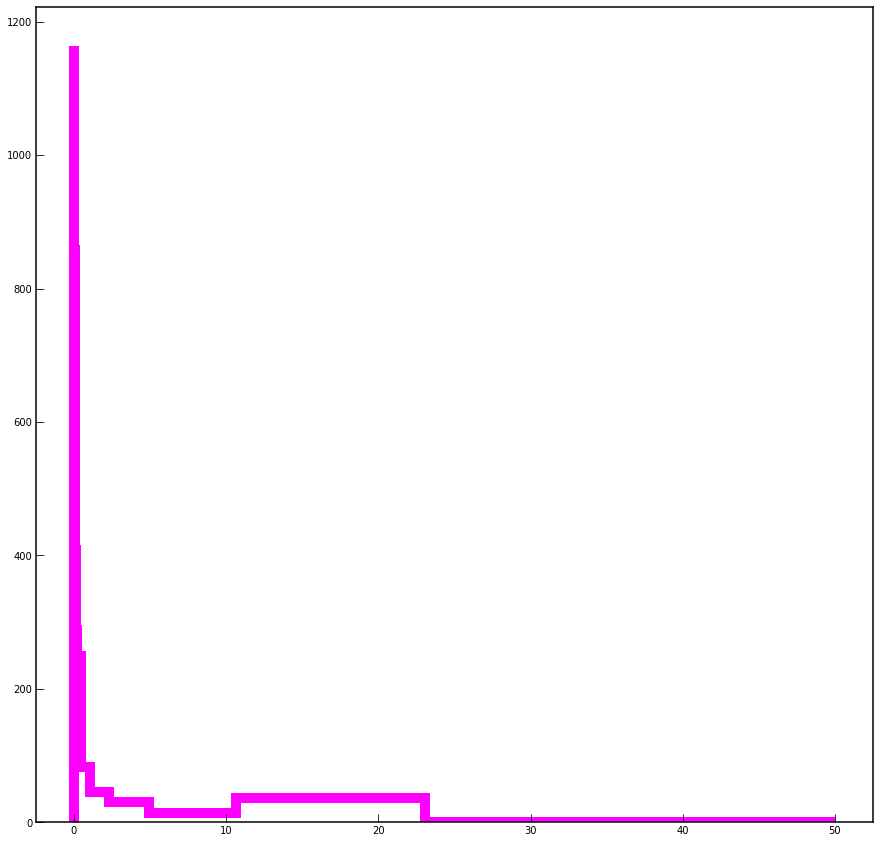

In [100]:

# HISTOGRAM OF PLANET MASS
binsl = np.logspace(-3,np.log10(50),15)
axps = plt.figure(figsize=(15,15)).add_subplot(111)
axps.hist(Mp/Mj, bins=binsl,histtype='step',lw=10,color='magenta', label='Generated Planets');
axps.hist(Mp[detind_pl]/Mj,bins=binsl,histtype='step',lw=10,color='green',alpha=0.7,label='Detected Planets');

axps.set_xlabel(r'Planet Mass [$M_J$]',fontsize=35)
axps.set_ylabel(r'Number of Stars',fontsize=35)

PT.simpleaxis1(axps)
plot_setup(axps,minortickson=False,majortick_size=15,majortick_width=5)
plt.setp(axps.spines.values(), linewidth=5)
axps.set_xlim(-2,(Mp.value/Mj).max()+10)
axps.set_ylim(-1,135)
axps.grid()

txt = """DISTRIBUTION OF PLANETS IN THE SURVEY"""    
axps.set_title('%s'%txt,fontsize=30,y=1.03)


plt.minorticks_off()
plt.legend(loc='best',fontsize=20)
#if save_plots:
plt.savefig('planetdistribution.png',edgecolor='none',bbox_inches='tight')        

# "CONTRAST CURVES"

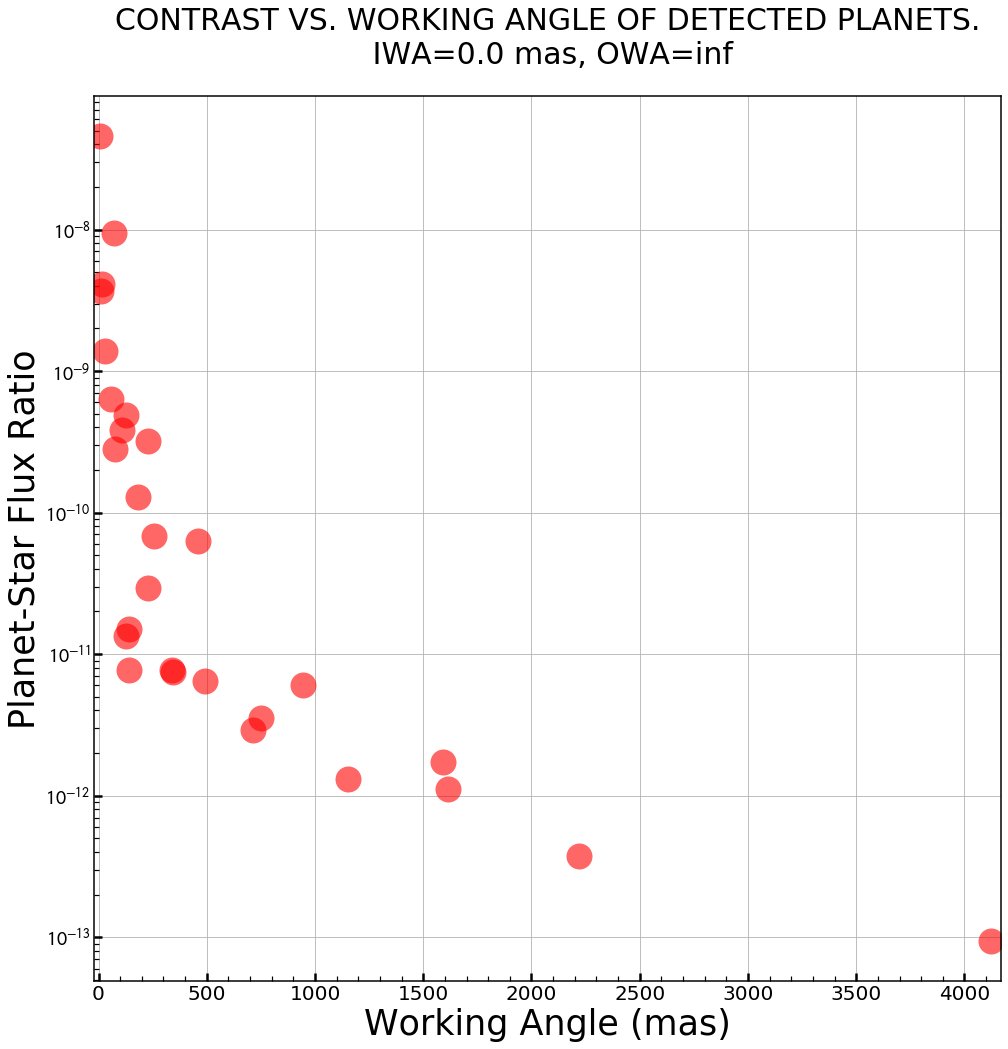

In [101]:
WA = DDRM['det_WA']
cntrst = 10**(DDRM['det_dMag']/(-2.5))
kw = {'markersize':26,'color':'r','marker':'o','alpha':.6,'mec':'none'}
axcc = scatterPlot(WA,cntrst,figsize=(15,15),**kw)
#axcc.set_ylim(axbv.get_ylim()[::-1])
axcc.set_ylabel(r'Planet-Star Flux Ratio',fontsize=35)
axcc.set_xlabel(r'Working Angle (mas)',fontsize=35)
axcc.set_xlim(-20,WA.max()+50)
plt.semilogy()

txt = """CONTRAST VS. WORKING ANGLE OF DETECTED PLANETS.\n IWA=0.0 mas, OWA=inf"""
axcc.set_title('%s'%txt,fontsize=30,y=1.03)
axcc.grid()
if save_plots: plt.savefig(os.path.join(dirsave,'contrast_plot%s.png'%basesim),edgecolor='none',bbox_inches='tight')
